# Regularization

Regularization implies preventing the machine learning model from excessively fitting the training set. In other words, it helps to avoid overfitting the model to the training set. In linear regression, this corresponds to reducing the magnitudes of the coefficients associated with the features.

Note that the scale of features can vary throught the normalization process. In general, when applying regularization, it is recommended to normalize the features first. Instead of directly calculating the mean and standard deviation vlaues to transform the features, the `StandardScaler` tarnsformer from scikit-learn can be used:

```python
from sklearn.preprocessing import StandardScaler

# Normalizer
ss = StandardScaler()
# Train the normalizer
ss.fit(train_poly)

# Normalizing the input datasets (training and test)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
```

By using StandardScaler, we can transform the feature values to have zero mean and unit variance.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('perch_full.csv')

# Input data : [length, height, weight]
perch_full = df.to_numpy()

# Target data
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

# Training and Test sets
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

# Transformer
poly = PolynomialFeatures(degree=5, include_bias=False)
# Train the transfomer
poly.fit(train_input) 

# Trainsforming the input datasets (training and test)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print("Train input : ", train_input.shape)
print("Train polynomial (by transformer): ", train_poly.shape)
# print(poly.get_feature_names_out())

# Normalizer
ss = StandardScaler()
# Train the normalizer
ss.fit(train_poly)

# Normalizing the input datasets (training and test)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

Train input :  (42, 3)
Train polynomial (by transformer):  (42, 55)


There are two models, Ridge and Lasso, which combine linear regression with regularization. Each model applies regularization using different methods. Ridge regularization utilizes the squared values of the coefficients as the standard, whereas Lasso regularization applies the absolute values of the coefficients. In many cases, Ridge is preferred. Both methods reduce the coefficients, but Lasso has the ability to set some coefficients to zero. Scikit-learn provides implementations for both Ridge and Lasso models.

## Ridge regularization

Let's first apply Ridge regularization to this set of 55 over-generated features.

In [8]:
from sklearn.linear_model import Ridge

# Ridge model
ridge = Ridge()

# Training the model
ridge.fit(train_scaled, train_target)

# R2 scores
score_by_training = ridge.score(train_scaled, train_target)
score = ridge.score(test_scaled, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.9896101671037343 (training data)
score : 0.9790693977615383 (test data)


Now we get the resionable score results.

When using Ridge or Lasso regularization, we have the flexibility to set the amount of regularization manually. By adjusting the alpha parameter when creating the instance of the model, we can control the strength of regularization. Higher `alpha` values result in stronger regularization, leading to increased underfitting. Conversely, lower alpha values weaken the manipulation of coefficients, making the regularization closer to linear regression and potentially increasing the risk of overfitting.

> The parameter `alpha` are not trained by the Ridge model, but rather they are specified beforehand. These types of parameters, which are directly determined by humans, are known as *hyperparameters*.

To determine the optimal `alpha` value, we can plot a graph of R2 scores against different `alpha` values. The point where the R2 scores for the training and test sets are closest to each other represents the most suitable value.

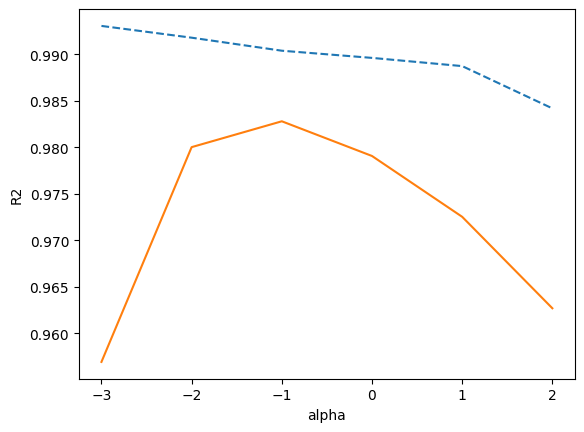

In [12]:
import matplotlib.pyplot as plt
train_score = list()
test_score = list()

# Log interval
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # Ridge model
    ridge = Ridge(alpha=alpha)
    # Training the model
    ridge.fit(train_scaled, train_target)
    # Appending the scores
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, linestyle='dashed')
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

The far left represents the typical behavior of overfitting, where the train score is excessively high and the test score is significantly low. The most appropriate `alpha` value is approximately $\log_{10}\alpha=-1$, which corresponds to $\alpha=10^{-1}=0.1$.

In [11]:
from sklearn.linear_model import Ridge

# Ridge model
ridge = Ridge(alpha=0.1)

# Training the model
ridge.fit(train_scaled, train_target)

# R2 scores
score_by_training = ridge.score(train_scaled, train_target)
score = ridge.score(test_scaled, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.9903815817570366 (training data)
score : 0.9827976465386937 (test data)


## Lasso regularization

Now let's apply Lasso regularization to the set of 55 over-generated features.

In [14]:
from sklearn.linear_model import Lasso

# Lasso model
lasso = Lasso()

# Training the model
lasso.fit(train_scaled, train_target)

# R2 scores
score_by_training = lasso.score(train_scaled, train_target)
score = lasso.score(test_scaled, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.989789897208096 (training data)
score : 0.9800593698421884 (test data)


Again, we can adjust the strength of the Lasso model training by modifying the `alpha` parameter. 

Note that during Lasso training, a `ConvergenceWarning` alert may occur. Scikit-learn's Lasso iteratively calculates the optimal values of coefficients, and this warning can be triggered when the specified number of iterations is reached. To ensure an adequate number of iternations, we can set the `max_iter` parameter to 10,000.

C:\Users\dada_\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\dada_\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


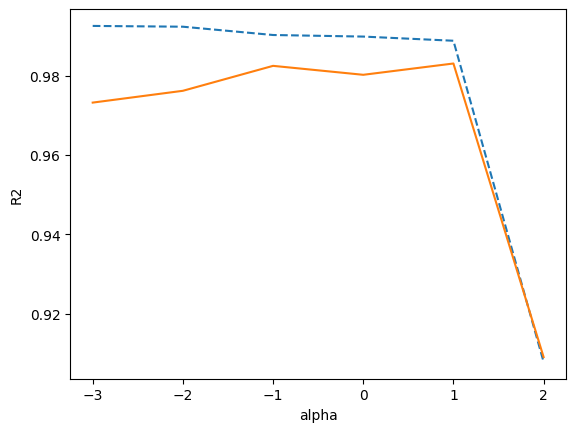

In [19]:
import matplotlib.pyplot as plt
train_score = list()
test_score = list()

# Log interval
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # Lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # Training the model
    lasso.fit(train_scaled, train_target)
    # Appending the scores
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, linestyle='dashed')
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

Again the far left side indicates overfitting behavior, while the far right side demonstrates significant underfitting. The most suitable `alpha` value in this case is approximately $\log_{10}\alpha=1$, which translates to $\alpha=10^{1}=10$.

In [23]:
from sklearn.linear_model import Lasso

# Lasso model
lasso = Lasso(alpha=10)

# Training the model
lasso.fit(train_scaled, train_target)

# R2 scores
score_by_training = lasso.score(train_scaled, train_target)
score = lasso.score(test_scaled, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.9888067471131867 (training data)
score : 0.9824470598706695 (test data)


Recall that Lasso regularization has the ability to set some coefficients to zero. Let's examine which coefficients have become zero.

In [27]:
print("Train input : ", train_input.shape)
print("Train polynomial : ", train_poly.shape)
print("Train polynomial scaled: ", train_scaled.shape)

print(ridge.coef_)
print(lasso.coef_)
print(np.sum(lasso.coef_ == 0))

Train input :  (42, 3)
Train polynomial :  (42, 55)
Train polynomial scaled:  (42, 55)
[8.05565374 7.88725565 7.40784577 7.47123014 7.4410635  7.13971183
 7.35784804 7.06234228 6.73795844 6.84005957 6.87336148 6.6183857
 6.8710696  6.61574515 6.3563402  6.83406174 6.5770234  6.31624676
 6.05577759 6.21635484 6.29581869 6.04864176 6.34766386 6.10026015
 5.85963972 6.36997656 6.12185119 5.87989872 5.64753069 6.36135147
 6.11192849 5.86802883 5.63295963 5.40863597 5.62391151 5.73948896
 5.4841318  5.83255851 5.57749011 5.33543563 5.90030552 5.64566636
 5.40327284 5.17665316 5.94034278 5.68605937 5.44318285 5.21516697
 5.00401328 5.95086271 5.69667594 5.45304758 5.22331242 5.00940259
 4.81193523]
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18

As a result, 40 coefficients in Lasso have been reduced to zero. Out of the 55 features we provided, Lasso has only utilized 15 features. This demonstrates how Lasso can be effective in extracting more meaningful features.